## Importing libraries

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

## Loading and Displaying an Example Image

In [2]:
img_array = cv2.imread("Training/0/Training_99847717.jpg")

In [3]:
img_array.shape

(48, 48, 3)

In [4]:
print(img_array)

[[[247 247 247]
  [248 248 248]
  [248 248 248]
  ...
  [156 156 156]
  [158 158 158]
  [145 145 145]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [161 161 161]
  [157 157 157]
  [160 160 160]]

 [[249 249 249]
  [249 249 249]
  [248 248 248]
  ...
  [159 159 159]
  [152 152 152]
  [157 157 157]]

 ...

 [[185 185 185]
  [197 197 197]
  [214 214 214]
  ...
  [108 108 108]
  [114 114 114]
  [137 137 137]]

 [[151 151 151]
  [203 203 203]
  [227 227 227]
  ...
  [114 114 114]
  [131 131 131]
  [156 156 156]]

 [[162 162 162]
  [233 233 233]
  [218 218 218]
  ...
  [126 126 126]
  [151 151 151]
  [167 167 167]]]


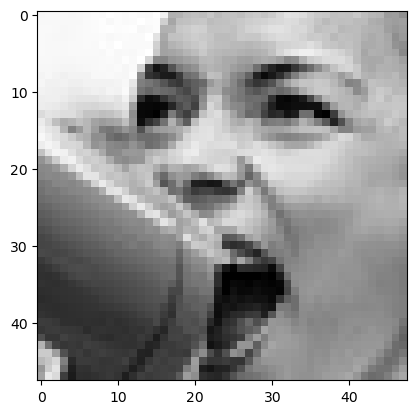

In [5]:
plt.imshow(img_array)

## Preparing Classes

In [6]:
Datadirectory = "Training/" ## Training dataset

In [7]:
Classes = ["0", "1", "2", "3", "4", "5", "6"] ## List of classes

## Display an Image from Each Class

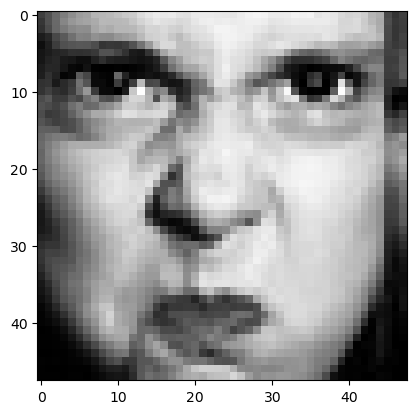

In [8]:
## To show the first image in the first class folder
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

## Resizing an Image

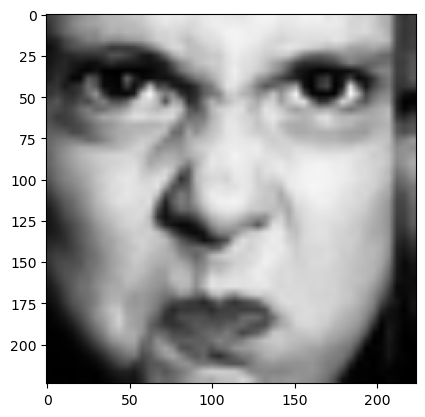

In [9]:
## To change the size of the image
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# To see the new image size
new_array.shape

(224, 224, 3)

**to create a dataset that we can use to train the model (process images from different categories, resize them and store them in a list as pairs of images and their class labels), the image arrays are input and the class labels are the target output**

## Creating the Training Dataset

In [11]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [12]:
create_training_Data()

In [13]:
print(len(training_Data)) ## How many images were read (6436 is good, that's all the images in training)

6436


## Shuffling the Data

In [14]:
## To convert the list to a numpy array before reshaping, but it's not necessary here
# temp = np.array(training_Data)
import random

random.shuffle(training_Data)

## Preparing Inputs/Outputs

In [15]:
X = [] ## Features, image arrays
y = [] ## Labels, class numbers

for features,label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) ## we're handling the conversion to numpy arrays here
#we convert to 4 dimensions because CNN expects input in this format

In [16]:
X.shape

(6436, 224, 224, 3)

In [17]:
X = X/255.0; ## normalizing the data

In [18]:
y[0]

6

In [19]:
type(y)

list

In [20]:
Y = np.array(y)

In [21]:
Y.shape

(6436,)

## Preparing the MobileNetV2 Model

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

In [23]:
checkpoint_path = "mobilenetv2_checkpoint.h5"

In [24]:
model = tf.keras.applications.MobileNetV2()

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [30]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [33]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer = "adam",
                  metrics = ["accuracy"]
)

In [57]:
## When we tried to train the model before adding the checkpoints and before reducing the images in the training folder
new_model.fit(X,Y,epochs = 25)

Epoch 1/25
898/898 [==============================] - 4472s 5s/step - loss: 1.2440 - accuracy: 0.5340
Epoch 2/25
898/898 [==============================] - 7912s 9s/step - loss: 1.0701 - accuracy: 0.5978
Epoch 3/25
898/898 [==============================] - 9796s 11s/step - loss: 0.9908 - accuracy: 0.6280
Epoch 4/25
898/898 [==============================] - 4528s 5s/step - loss: 0.9361 - accuracy: 0.6532
Epoch 5/25
484/898 [===============>..............] - ETA: 1:10:35 - loss: 0.8740 - accuracy: 0.6736


KeyboardInterrupt



## Loading/Saving the Model Automatically and Training

In [34]:
import os

# Définir le chemin du fichier de sauvegarde du modèle
checkpoint_path = "mobilenetv2_checkpoint.h5"

# Vérifie si un modèle sauvegardé existe déjà
if os.path.exists(checkpoint_path):
    new_model = tf.keras.models.load_model(checkpoint_path)
    print("✅ Modèle chargé depuis le checkpoint.")
else:
    print("🚀 Aucun checkpoint trouvé. Un nouveau modèle sera entraîné.")

# Recompiler le modèle après chargement (recommandé)
new_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Définir le callback pour sauvegarder le modèle à chaque epoch
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=False,       # on veut sauvegarder à chaque époque, pas juste la meilleure
    save_weights_only=False,    # on sauvegarde tout le modèle, pas juste les poids
    save_freq='epoch',          # à chaque epoch
    verbose=1
)

epochs_already_done = 0
epochs_to_run = 25 - epochs_already_done
# Entraîner le modèle
new_model.fit(X, Y, epochs=epochs_to_run, callbacks=[checkpoint])

🚀 Aucun checkpoint trouvé. Un nouveau modèle sera entraîné.
Epoch 1/25
202/202 [==============================] - ETA: 0s - loss: 1.5480 - accuracy: 0.4024     
Epoch 1: saving model to mobilenetv2_checkpoint.h5
202/202 [==============================] - 2153s 11s/step - loss: 1.5480 - accuracy: 0.4024
Epoch 2/25
202/202 [==============================] - ETA: 0s - loss: 1.2825 - accuracy: 0.5166   
Epoch 2: saving model to mobilenetv2_checkpoint.h5
202/202 [==============================] - 2098s 10s/step - loss: 1.2825 - accuracy: 0.5166
Epoch 3/25
202/202 [==============================] - ETA: 0s - loss: 1.1489 - accuracy: 0.5761   
Epoch 3: saving model to mobilenetv2_checkpoint.h5
202/202 [==============================] - 2479s 12s/step - loss: 1.1489 - accuracy: 0.5761
Epoch 4/25
202/202 [==============================] - ETA: 0s - loss: 1.0459 - accuracy: 0.6162   
Epoch 4: saving model to mobilenetv2_checkpoint.h5
202/202 [==============================] - 2151s 11s/step - lo

## Saving the model and loading it

In [35]:
new_model.save('final_model.h5')

In [36]:
new_model = tf.keras.models.load_model('final_model.h5')

## Testing on an Image

In [102]:
frame = cv2.imread("happyboy.jpg")
# frame = cv2.imread("surprisedman.jpg")

In [103]:
frame.shape

(746, 743, 3)

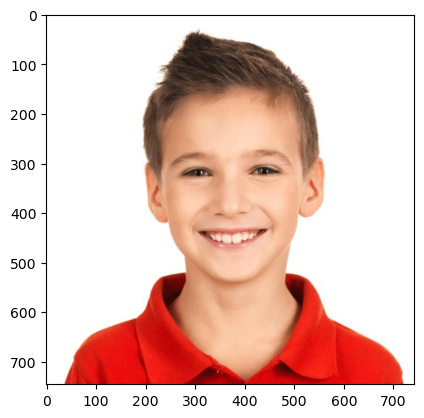

In [104]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Face Detection

In [105]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [106]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [107]:
gray.shape

(746, 743)

## Extracting the Face Region

In [108]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
if len(faces) == 0:
    print("Face not detected")
else:
    for (x, y, w, h) in faces:
        face_roi = frame[y:y+h, x:x+w]  # take color face region directly
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        break

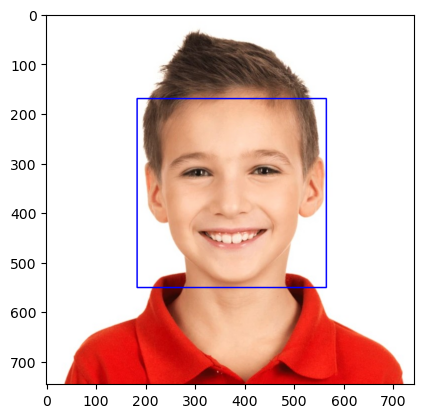

In [109]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

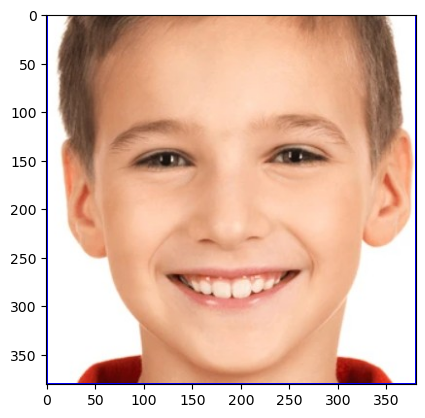

In [110]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

## Preparing the Image for Prediction

In [111]:
final_image =cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis =0)
final_image=final_image/255.0

## Making a Prediction

In [112]:
Predictions =new_model.predict(final_image)

1/1 [==============================] - 0s 132ms/step


In [113]:
Predictions[0]

array([2.9341218e-06, 7.7153146e-09, 4.1789002e-07, 9.7573906e-01,
       2.4248574e-02, 1.8118210e-06, 7.2420053e-06], dtype=float32)

In [114]:
np.argmax(Predictions) ## it correctly predicted the emotion in this image "happy"

3

## Real-Time Emotion Detection via Webcam

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Loading the trained emotion detection model
new_model = load_model('final_model.h5')

font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# Set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# Make a black image
img = np.zeros((500, 500))

# Set some text
text = "Some text in a box!"

# Get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# Set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# Make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y),
              (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

# Start webcam
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) == 0:
        print("Face not detected")
    else:
        for (x, y, w, h) in faces:
            face_roi = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            final_image = cv2.resize(face_roi, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image / 255.0

            Predictions = new_model.predict(final_image)
            label = np.argmax(Predictions)

            emotions = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
            status = emotions[label]

            x1, y1, w1, h1 = 0, 0, 175, 75
            cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
            cv2.putText(frame, status, (x1 + int(w1 / 10), y1 + int(h1 / 2)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

            break  # Only handle the first detected face

    cv2.imshow("Emotion Detector", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not d